# สมาชิก
6510405369 จันทร์ทิพ พิริยบรรเจิด  
6410401078 ธนฤกษ์  โอเจริญ  
6410406771 ปัณณทัต  ด้วงแค  

## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [150]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [151]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from tensorflow import keras

import cv2
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [152]:
img_directory = './images/'
img_paths = ['dumbel.png', 'lamp.png', 'tissue.png', 'dumbelandtissue.png']

In [153]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [154]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [155]:
img_path = img_directory + "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the coffee mug Image
    img_path = img_directory + "coffee_mug.jpg"
    print("Using the Test Coffee Mug Image: {}".format(img_path))

### Image from webcam

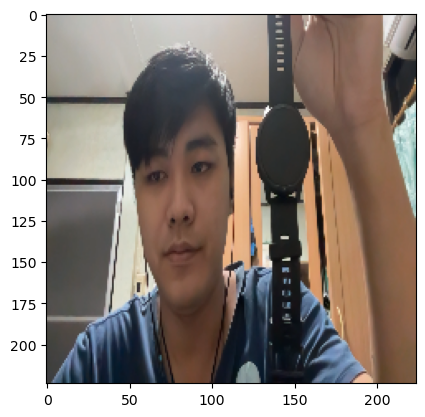

In [156]:
plt.imshow(mpimg.imread(img_path))

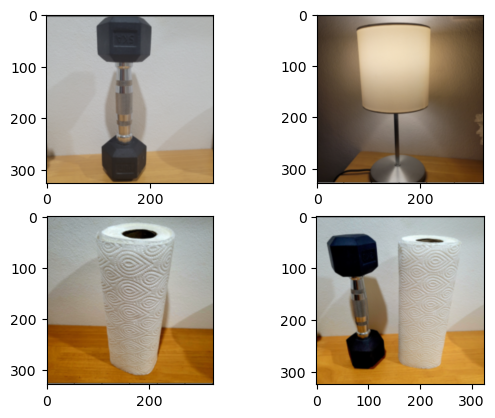

In [157]:
# Image set
for i in range(len(img_paths)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(mpimg.imread(img_directory + img_paths[i]))

## VGG16 - Pretrained Model

In [158]:
from tensorflow.keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [159]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

1/1 [==============================] - 0s 174ms/step


2023-01-27 23:28:15.680464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Predicted Class          Name  Probability
0       n04023962  punching_bag     0.316142
1       n04270147       spatula     0.135357
2       n04039381        racket     0.110724
3       n03041632       cleaver     0.029236
4       n04597913  wooden_spoon     0.020610
5       n03633091         ladle     0.018596
6       n02879718           bow     0.017481
7       n03759954    microphone     0.012570
8       n02892767     brassiere     0.011660
9       n03720891        maraca     0.011065

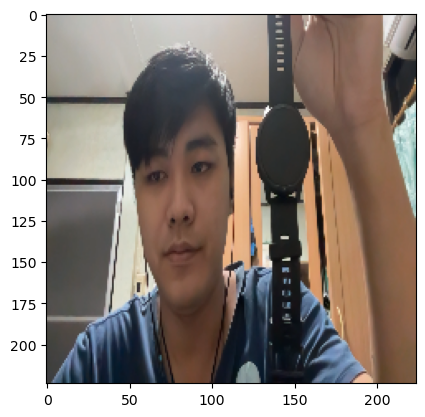

In [160]:
# Predict Results
plt.imshow(mpimg.imread(img_path))
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 14ms/step


Predicted Class           Name  Probability
0       n04380533     table_lamp     0.712395
1       n03637318      lampshade     0.282433
2       n02948072         candle     0.002297
3       n04286575      spotlight     0.001604
4       n03887697    paper_towel     0.000168
5       n03793489          mouse     0.000124
6       n04553703      washbasin     0.000057
7       n04404412     television     0.000052
8       n15075141  toilet_tissue     0.000045
9       n03201208   dining_table     0.000044

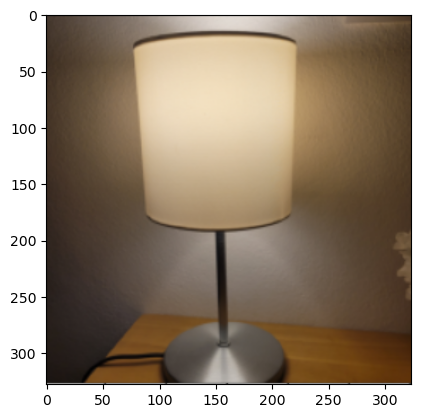

In [161]:
plt.imshow(mpimg.imread(img_directory + img_paths[1]))
predict_image(vgg16_model, img_directory + img_paths[1], vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 20ms/step


Predicted Class            Name  Probability
0       n03255030        dumbbell     0.399886
1       n04485082          tripod     0.112664
2       n03759954      microphone     0.093420
3       n03602883        joystick     0.088391
4       n04023962    punching_bag     0.021682
5       n04041544           radio     0.020309
6       n03995372     power_drill     0.016971
7       n02790996         barbell     0.015265
8       n03691459     loudspeaker     0.014636
9       n03297495  espresso_maker     0.013669

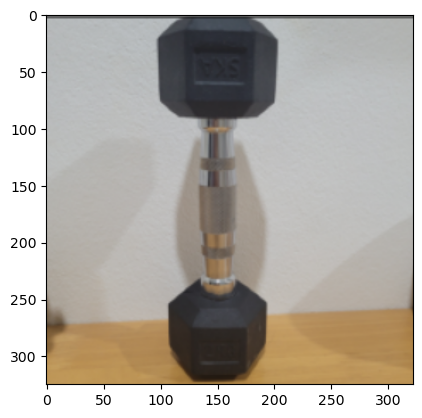

In [162]:
plt.imshow(mpimg.imread(img_directory + img_paths[0]))
predict_image(vgg16_model, img_directory + img_paths[0], vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 13ms/step


Predicted Class           Name   Probability
0       n15075141  toilet_tissue  5.400929e-01
1       n03887697    paper_towel  4.598630e-01
2       n02948072         candle  1.383816e-05
3       n04522168           vase  5.778993e-06
4       n03637318      lampshade  3.374804e-06
5       n04380533     table_lamp  2.869161e-06
6       n03063599     coffee_mug  1.413846e-06
7       n03843555     oil_filter  1.154769e-06
8       n07930864            cup  9.517590e-07
9       n02786058       Band_Aid  8.242765e-07

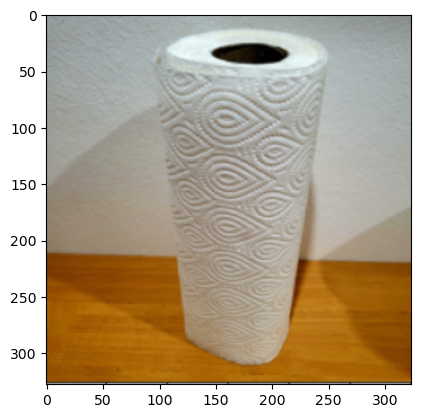

In [163]:
plt.imshow(mpimg.imread(img_directory + img_paths[2]))
predict_image(vgg16_model, img_directory + img_paths[2], vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 13ms/step


Predicted Class           Name  Probability
0       n03887697    paper_towel     0.979265
1       n15075141  toilet_tissue     0.014935
2       n04380533     table_lamp     0.000831
3       n04023962   punching_bag     0.000651
4       n03691459    loudspeaker     0.000492
5       n02948072         candle     0.000487
6       n03970156        plunger     0.000379
7       n03759954     microphone     0.000334
8       n03637318      lampshade     0.000238
9       n04591713    wine_bottle     0.000173

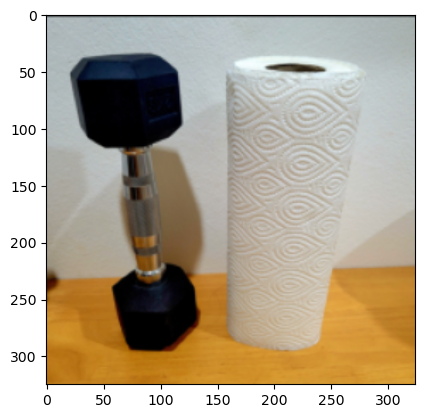

In [164]:
plt.imshow(mpimg.imread(img_directory + img_paths[3]))
predict_image(vgg16_model, img_directory + img_paths[3], vgg16.preprocess_input, vgg16.decode_predictions)

## Resnet50 - Pretrained Model

In [165]:
# Define a Resnet model and print the model summary (follow the same procedure as in VGGNet)

# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16
from tensorflow.keras.applications import resnet

resnet50_model = resnet.ResNet50(weights='imagenet')
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

2023-01-27 23:28:18.402613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 723ms/step


Predicted Class              Name  Probability
0       n04090263             rifle     0.150330
1       n02749479     assault_rifle     0.114824
2       n02916936  bulletproof_vest     0.075601
3       n03942813    ping-pong_ball     0.073080
4       n03594734              jean     0.040266
5       n04270147           spatula     0.040128
6       n03041632           cleaver     0.036560
7       n02879718               bow     0.022561
8       n03450230              gown     0.021348
9       n02667093             abaya     0.019673

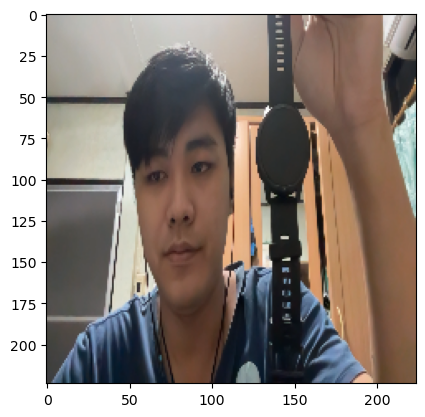

In [166]:
# Predict Results
plt.imshow(mpimg.imread(img_path))
predict_image(resnet50_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 0s 73ms/step


Predicted Class          Name  Probability
0       n04380533    table_lamp     0.929457
1       n03637318     lampshade     0.066177
2       n04286575     spotlight     0.003825
3       n03179701          desk     0.000101
4       n04404412    television     0.000064
5       n03691459   loudspeaker     0.000049
6       n03271574  electric_fan     0.000039
7       n04023962  punching_bag     0.000032
8       n03782006       monitor     0.000029
9       n03337140          file     0.000021

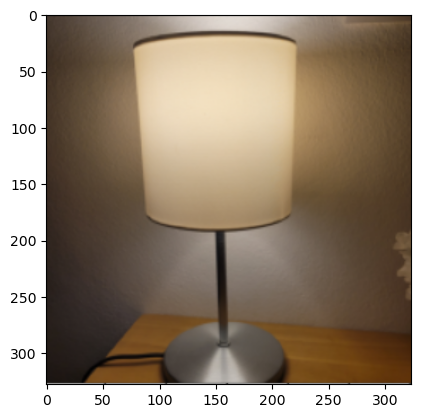

In [167]:
plt.imshow(mpimg.imread(img_directory + img_paths[1]))
predict_image(resnet50_model, img_directory + img_paths[1], resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 0s 28ms/step


Predicted Class          Name  Probability
0       n03255030      dumbbell     0.837803
1       n02790996       barbell     0.117435
2       n03759954    microphone     0.016482
3       n04023962  punching_bag     0.005889
4       n02841315    binoculars     0.003843
5       n03691459   loudspeaker     0.003233
6       n04485082        tripod     0.002135
7       n04009552     projector     0.001975
8       n04286575     spotlight     0.001742
9       n03995372   power_drill     0.001224

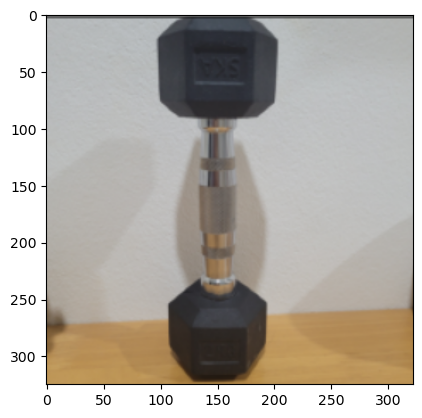

In [168]:
plt.imshow(mpimg.imread(img_directory + img_paths[0]))
predict_image(resnet50_model, img_directory + img_paths[0], resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 0s 25ms/step


Predicted Class             Name  Probability
0       n03887697      paper_towel     0.944483
1       n15075141    toilet_tissue     0.054753
2       n04522168             vase     0.000699
3       n03062245  cocktail_shaker     0.000026
4       n04456115            torch     0.000011
5       n03041632          cleaver     0.000008
6       n03840681          ocarina     0.000004
7       n03991062              pot     0.000003
8       n04380533       table_lamp     0.000002
9       n02948072           candle     0.000002

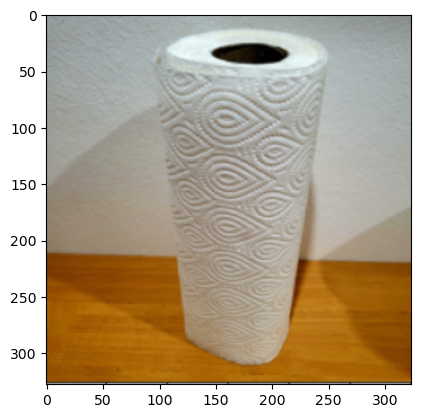

In [169]:
plt.imshow(mpimg.imread(img_directory + img_paths[2]))
predict_image(resnet50_model, img_directory + img_paths[2], resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 0s 26ms/step


Predicted Class             Name   Probability
0       n03887697      paper_towel  9.998901e-01
1       n15075141    toilet_tissue  1.098558e-04
2       n03843555       oil_filter  3.437425e-08
3       n03062245  cocktail_shaker  9.209418e-09
4       n04456115            torch  8.921498e-09
5       n03255030         dumbbell  5.856216e-09
6       n03691459      loudspeaker  3.153892e-09
7       n04522168             vase  2.970873e-09
8       n02948072           candle  2.811543e-09
9       n04254120   soap_dispenser  2.537891e-09

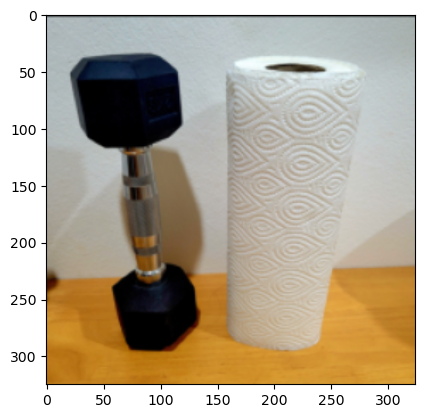

In [170]:
plt.imshow(mpimg.imread(img_directory + img_paths[3]))
predict_image(resnet50_model, img_directory + img_paths[3], resnet.preprocess_input, resnet.decode_predictions)

# โมเดล VGG16 และ RESNET จำแนกประเภทถูกต้องหรือไม่
ทั้งสองโมเดลสามารถจำแนกประเภทของได้อย่างถูกต้อง แต่มีข้อแตกต่างที่โมเดล RESNET จะจำแนกประเภทที่ได้อันดับ 1 โดยจะมีความน่าจะเป็นค่อนข้างสูง อยู่ในช่วง 0.8-0.9
ในขณะที่ VGG16 ประเภทที่ได้อันดับ 1 จะมีความน่าจะเป็นตั้งแต่ 0.39 ไปจนถึง 0.9 แสดงให้เห็นว่า โมเดล RESNET จะมีการทำนายผลที่เฉพาะเจาะจงกว่า ในขณะที่ VGG16 จะไให้คำตอบที่ไม่เจาะจง

# ค่าความมันใจที่ได้จากโมเดล
จะพบว่าโมเดลทั้งสอง จะให้ประเภทอันดับ 1 มีค่าใกล้กับ 1 มากที่สุด ซึ่งในรูปที่โมเดลเหล่านี้มีข้อมูล และรูปตัวอย่างของเราชัดเจน จะพบว่าความมั่นใจในการจัดกลุ่มจะสูงมาก
แต่ในรูปที่เป็นรูปที่มนุษย์เองก็มองยากว่าเป็นอะไร ค่าความมั่นใจของโมเดลจะน้อยมากๆ และทั้งสองโมเดลก็จัดกลุ่มรูปนั้นแตกต่างกัน

# โมเดลทั้ง 2 สามารถจำแนกประเภทของหลายสิ่งในภาพได้หรือไม่ อย่างไร

ทั้ง Resnet50 และ VGG16 ไม่สามารถจำแนกของหลายสิ่งในภาพได้ 

Softmaxคือ ฟังก์ชันที่รับ Input แล้ว Normalize ออกมาเป็นความน่าจะเป็น Probability ที่ผลรวมเท่ากับ 1 แต่เหมาะกับการใช้งานที่คาดหวัง Output ที่ถูกต้องอันเดียวเท่านั้น 

feature map คือ บันทึกลักษณะต่าง ๆ ของรูปภาพเหล่านั้น ในแต่ละ Layer ต่อยอดขึ้นไปเรื่อยๆ ตั้งแต่ จุด เส้นแนวตั้ง เส้นแนวนอน เส้นแนวทแยง มุม เส้นโค้ง วงกลม พื้นผิว ลวดลาย ไปจนถึง วัตถุที่เรากำหนด

แต่เนื่องจาก softmax ใช้งานที่คาดหวัง Output ที่ถูกต้องอันเดียวเท่านั้น model จึงไม่ทราบว่าจะต้องให้ความสำคัญกับวัตถุตำแหน่งไหนเป็นอันดับแรก feature map จึงมีลักษณะบางส่วนเป็นวัตถุแรกและบางส่วนเป็นวัตถุสอง ทำให้ model ไม่สามารถจำแนกของทั้งสองสิ่งได้อย่างแม่นยำ


## Feature map ของ paper towel โดยใช้ VGG16

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 36ms/step


2023-01-27 23:28:19.968421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/31/jkvnd89x7zj51y8qmlmsmgh00000gn/T/ipykernel_22863/78451910.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(square, square, ix)


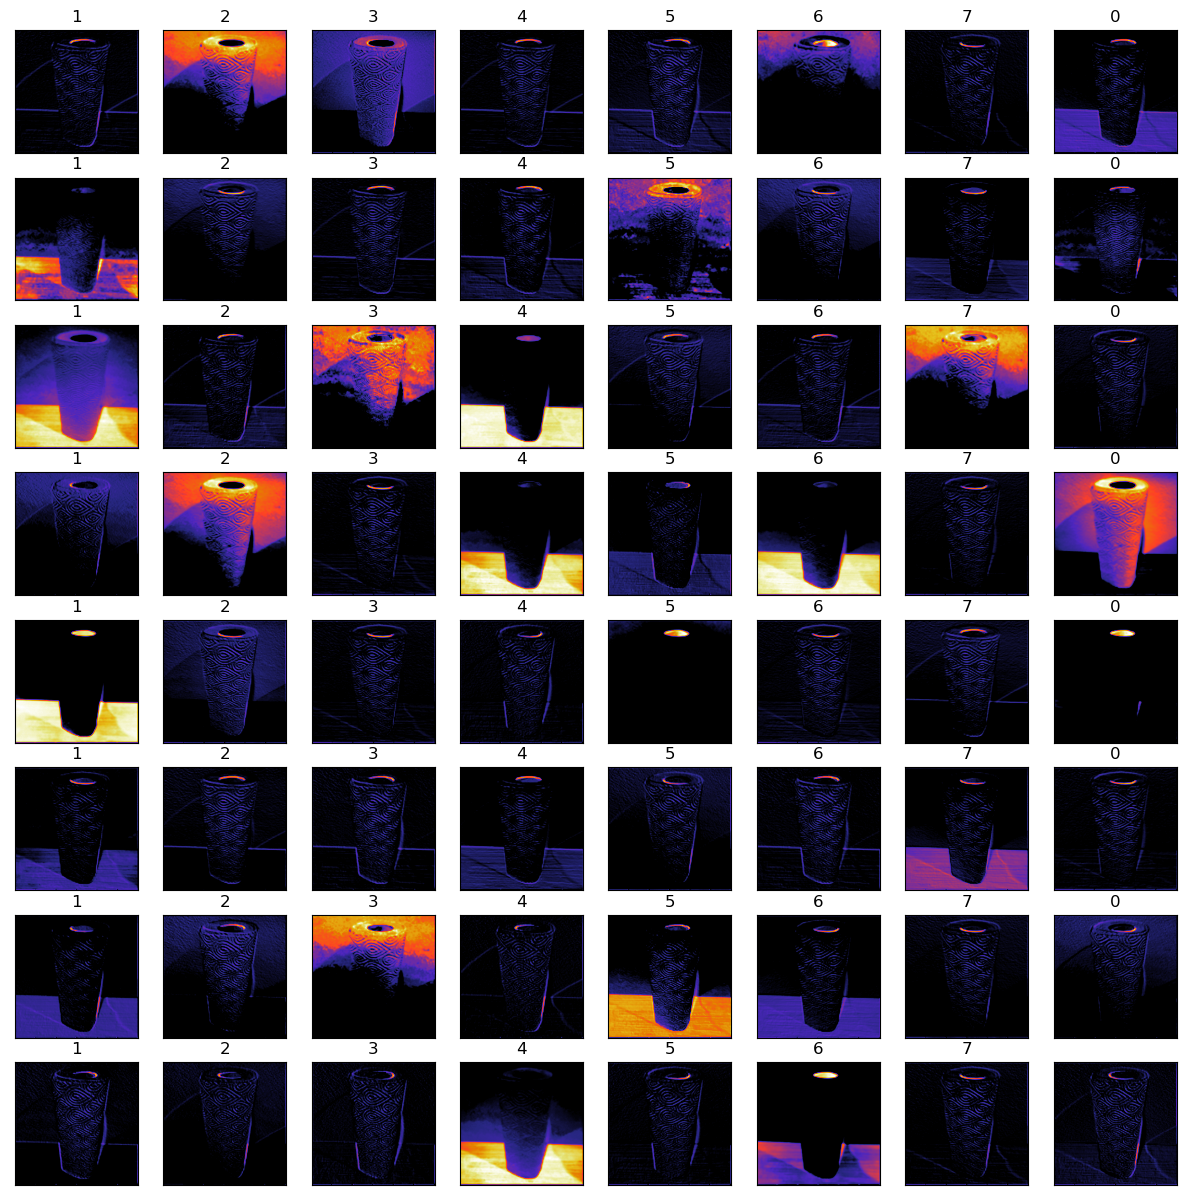

In [171]:
model = keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[1].output)
model.summary()
img_path =img_directory + img_paths[2]
# get feature map for first hidden layer
target_size=(224,224)
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)
feature_maps = model.predict(img)
feature_maps.shape
plt.figure(figsize=(15,15))
# plot the 64 maps in an 8x8 squares
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        plt.title(j)
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='CMRmap') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

จากภาพการ visualize feature map ด้านบนจะเห็นได้ว่าใน feature map มีโค้งมน ส่วนที่เป็นเส้นตรง วงกลม และอื่นๆของกระดาษทิชชู่

## Feature map ของ dumbbell และ paper towel ในภาพเดียวกันโดยใช้ VGG16

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 34ms/step


2023-01-27 23:28:21.487689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/31/jkvnd89x7zj51y8qmlmsmgh00000gn/T/ipykernel_22863/2437965011.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(square, square, ix)


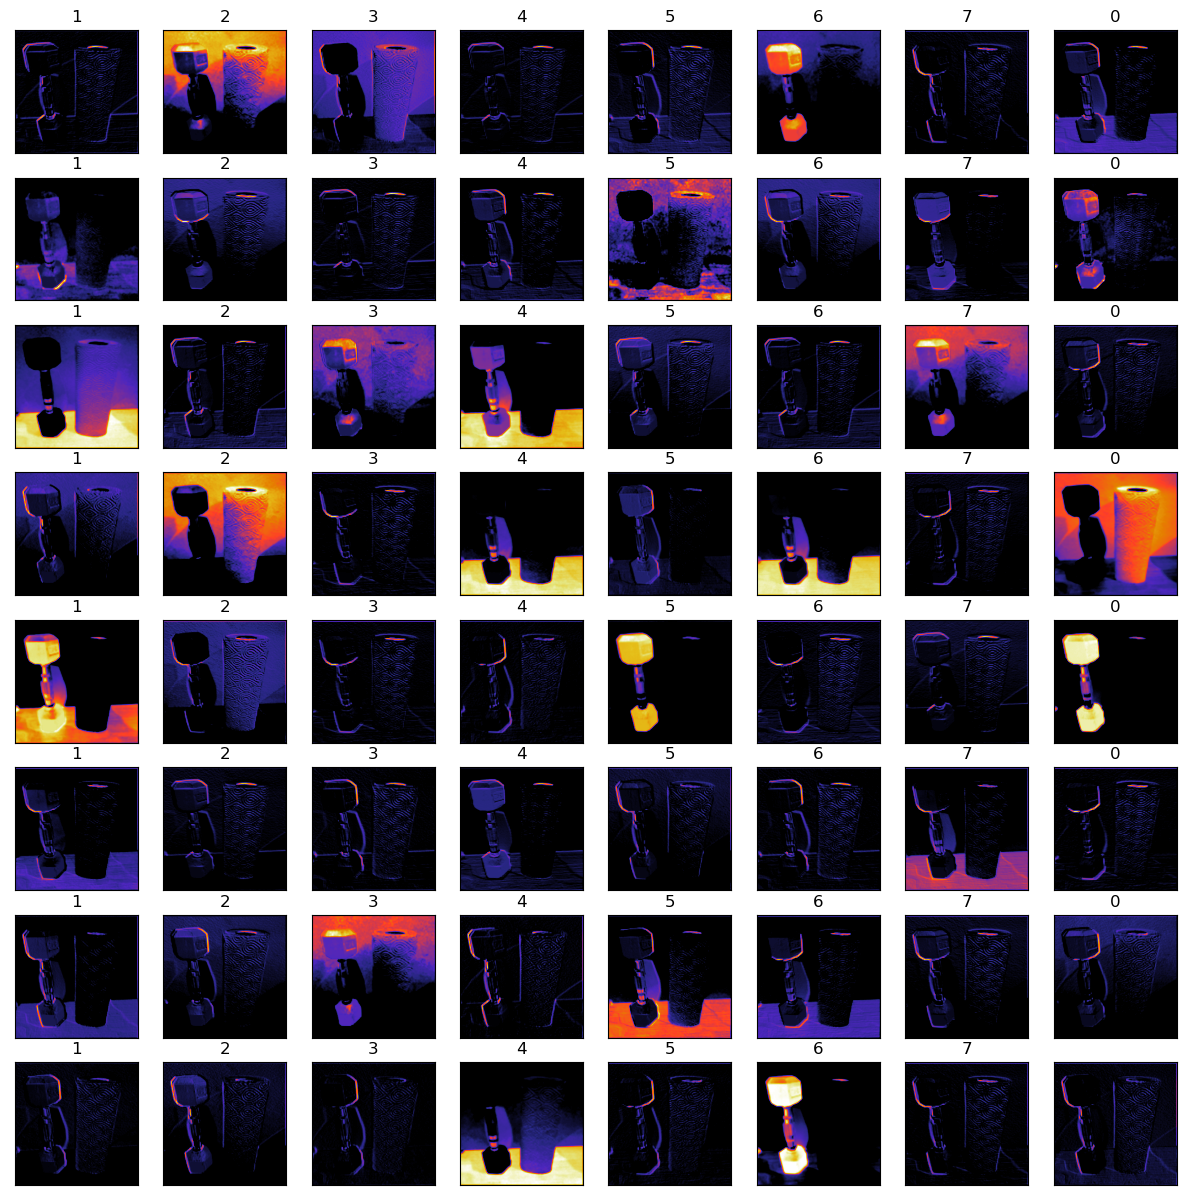

In [172]:

model = keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[1].output)
model.summary()
img_path = img_directory + img_paths[3]
# get feature map for first hidden layer
target_size=(224,224)
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)
feature_maps = model.predict(img)
feature_maps.shape
plt.figure(figsize=(15,15))
# plot the 64 maps in an 8x8 squares
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        plt.title(j)
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='CMRmap') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

จากภาพการ visualize feature map ด้านบนจะเห็นได้ว่าใน feature map มีทั้งลักษณะโค้งมน ส่วนที่เป็นเส้นตรง วงกลม และอื่นๆของกระดาษทิชชู่และดัมเบล

## นิสิตคิดว่าประเภทที่โมเดลจำแนกผิดเกิดขึ้นได้อย่างไร เพราะอะไร
อาจเป็นเพราะ สิ่งที่ทำนายได้ไม่อยู่ใน class ของ ImageNet ทำให้ไม่มี weights ของสิ่งที่เราทำนาย model จึงทำการหาสิ่งของที่มีลักษณะใกล้เคียงที่สุดจาก class ของ ImageNet และทำให้เกิดการจำแนกผิด 


หรือ อาจเป็นเพราะลักษณะภาพที่ใช้ train แตกต่างจากสิ่งที่เราต้องการทำนาย 
ซึ่งอาจเกิดขึ้นกับ วัตถุที่มีรูปทรงหลากหลายแบบ เช่น แก้ว โคมไฟ 
หรือในทำนองเดียวกันเนื่องจาก Dataset ของ ImageNet ถูกสร้างขึ้นในช่วงปี 2012-2017 ทำให้ลักษณะของวัตถุที่เคย train ไว้อาจไม่ตรงกับลักษณะวัตถุในปัจจุบันทำให้เกิดการจำแนกผิด 